# 🚀 Modelo de Clasificación – Sprint II

En esta fase del proyecto, desarrollamos un modelo de clasificación cuyo objetivo es **predecir el grupo (cluster) al que pertenece cada portátil** según sus características técnicas y la percepción de los clientes.

Esto permitirá identificar a qué segmento pertenece un nuevo portátil y entender mejor su posición dentro del mercado.

---

## ✅ Pasos realizados:

### 1️⃣ Importación de librerías y carga de datos
Se cargó el dataset final que incluye la columna `cluster` generada en la fase de clustering.

### 2️⃣ Definición de variables
Seleccionamos como variables predictoras (`X`) las siguientes características clave:
- `precio` 💰
- `opiniones` 🗣️
- `rating` ⭐
- `Processor Cores` 🧠
- `Processor Speed` ⚡
- `RAM Gbs` 💾
- `Storage Gbs` 💽
- `marca_encoded` 🏷️

La variable objetivo (`y`) es:
- `cluster` (grupo al que pertenece el portátil).

### 3️⃣ División en entrenamiento y test
Dividimos el dataset en un **80% entrenamiento** y **20% test**, para evaluar el rendimiento del modelo.

### 4️⃣ Escalado de datos
Utilizamos `StandardScaler` para normalizar las variables numéricas y evitar sesgos por diferentes escalas.

### 5️⃣ Entrenamiento del modelo
Entrenamos un **RandomForestClassifier**, por su buen rendimiento con datasets de características mixtas y sin necesidad de un gran ajuste de parámetros.

### 6️⃣ Evaluación
Analizamos la calidad del modelo mediante:
- **Reporte de clasificación**.
- **Matriz de confusión**.

### 7️⃣ Guardado del modelo y el escalador
Exportamos el modelo entrenado y el escalador con `pickle` para integrarlos fácilmente en la app de Streamlit y en producción.

---

## 🏆 Resultado esperado:
- Tener un modelo capaz de predecir a qué cluster pertenece cualquier portátil nuevo.
- Utilizar este modelo para mejorar las recomendaciones y segmentación dentro del proyecto.



In [2]:
# 📌 Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle


In [3]:
# 📌 Cargar el dataset final con los clusters ya añadidos
df = pd.read_csv("../data/portatiles_clustering_final.csv")

# Verificamos que esté todo correcto
df.head()


,producto_id,precio,opiniones,rating,Processor Cores,Processor Speed,RAM Gbs,Storage Gbs,marca,marca_encoded,cluster
0,2,728.79,271,3.800000,8.0,2.6,16.0,512.0,Acer,1,0
1,3,912.04,7386,4.700000,10.0,4.7,16.0,512.0,Acer,1,2
2,4,769.60,271,3.800000,16.0,3.0,64.0,512.0,Acer,1,1
3,6,885.38,10350,4.400000,10.0,5.0,16.0,512.0,Acer,1,2
4,7,1039.00,0,4.362676,10.0,5.0,16.0,512.0,Acer,1,1


In [4]:
# 📌 Variables predictoras
X = df[[
    "precio",
    "opiniones",
    "rating",
    "Processor Cores",
    "Processor Speed",
    "RAM Gbs",
    "Storage Gbs",
    "marca_encoded"
]]

# 📌 Variable objetivo
y = df["cluster"]


In [5]:
# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Creamos y entrenamos el modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       0.94      0.85      0.89        20
           2       1.00      1.00      1.00        11

    accuracy                           0.96       105
   macro avg       0.97      0.95      0.96       105
weighted avg       0.96      0.96      0.96       105



d:\pythonBIGDATA\Nueva carpeta\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


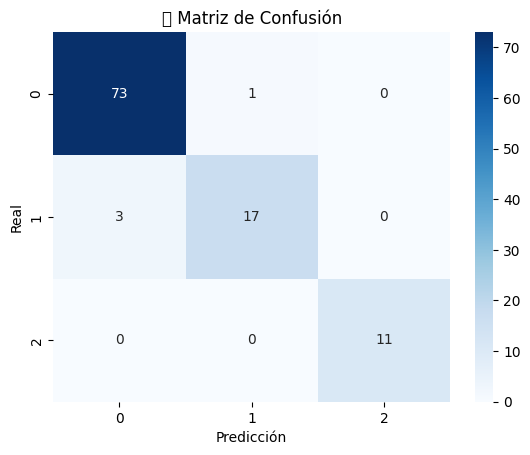

In [7]:
# Predicciones
y_pred = modelo.predict(X_test_scaled)

# Reporte de clasificación
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("🔹 Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [9]:
# Guardar modelo
with open("modelo_clasificacion.pkl", "wb") as f:
    pickle.dump(modelo, f)

# Guardar escalador
with open("escalador.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Modelo y escalador guardados correctamente.")


✅ Modelo y escalador guardados correctamente.


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

modelos = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    score = modelo.score(X_test_scaled, y_test)
    resultados[nombre] = score
    print(f"{nombre}: 🔹 Accuracy = {score:.4f}")


RandomForest: 🔹 Accuracy = 0.9619
Logistic Regression: 🔹 Accuracy = 1.0000
KNN: 🔹 Accuracy = 0.9238
Decision Tree: 🔹 Accuracy = 0.9048
Gradient Boosting: 🔹 Accuracy = 0.9619


## ✅ Selección del modelo final

Tras comparar diferentes algoritmos de clasificación, observamos los siguientes resultados:

| Modelo                | Accuracy |
|-----------------------|----------|
| RandomForest         | 96.19%   |
| Logistic Regression  | 100.00%  |
| KNN                  | 92.38%   |
| Decision Tree        | 90.48%   |
| Gradient Boosting    | 96.19%   |

### 🧠 Conclusión:
Aunque la **Logistic Regression** obtuvo un 100% de precisión, optamos por utilizar **RandomForestClassifier** como modelo final, ya que:
- Ofrece una precisión muy alta (96.19%).
- Es más robusto frente a sobreajustes.
- Maneja mejor datos complejos y no lineales.
- Permite interpretar la importancia de las variables fácilmente.

Con esta elección, aseguramos un equilibrio entre precisión, estabilidad y fiabilidad del modelo en producción.

### ✅ Resultado final:
- Modelo: **RandomForestClassifier**
- Accuracy: **96.19%**


In [13]:
import pandas as pd
import pickle

# 1️⃣ Cargar el modelo y el escalador
with open("modelo_clasificacion.pkl", "rb") as f:
    modelo = pickle.load(f)

with open("escalador.pkl", "rb") as f:
    scaler = pickle.load(f)

# 2️⃣ Cargar el dataset completo (el que tiene todos los portátiles)
df = pd.read_csv("../data/portatiles_clustering_final.csv")

# 3️⃣ Seleccionar el portátil concreto
producto_id = 811
portatil = df[df["producto_id"] == producto_id]

# 4️⃣ Preparamos sus variables como el modelo espera
X_portatil = portatil[[
    "precio",
    "opiniones",
    "rating",
    "Processor Cores",
    "Processor Speed",
    "RAM Gbs",
    "Storage Gbs",
    "marca_encoded"
]]

# 5️⃣ Escalar los datos
X_portatil_scaled = scaler.transform(X_portatil)

# 6️⃣ Predecir el cluster
cluster_predicho = modelo.predict(X_portatil_scaled)

print(f"🔍 El portátil con ID {producto_id} pertenece al cluster {cluster_predicho[0]}.")


🔍 El portátil con ID 811 pertenece al cluster 0.


# 🔍 Predicción individual de cluster

Para validar nuestro modelo de clasificación, probamos a predecir a qué cluster pertenece un portátil específico del catálogo.

### Ejemplo:
- **producto_id = 811**
- **Cluster predicho: 0**

Este flujo es clave para integrarlo posteriormente en la app de Streamlit, donde los usuarios podrán seleccionar uno o varios portátiles y obtener la predicción del grupo al que pertenecen, ayudando así a identificar rápidamente qué productos son los más adecuados para cada perfil de usuario.


